In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [25]:
df = pd.read_csv("emlak-veri.txt")
df.head()

,AREA_LANDZONE,NON_RETAIL,AVER_ROOMS,OWNER_OCCUPIED,INDEX_HIGHWAYS,TAX,PTRATIO,MEDIAN_VAL
0,18.0,2.31,6.575,65.2,A,296,15.3,24.0
1,0.0,7.07,6.421,78.9,B,242,17.8,21.6
2,0.0,7.07,7.185,61.1,B,242,17.8,34.7
3,0.0,2.18,6.998,45.8,C,222,18.7,33.4
4,0.0,2.18,7.147,54.2,C,222,18.7,36.2


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AREA_LANDZONE   500 non-null    float64
 1   NON_RETAIL      500 non-null    float64
 2   AVER_ROOMS      500 non-null    float64
 3   OWNER_OCCUPIED  500 non-null    float64
 4   INDEX_HIGHWAYS  500 non-null    object 
 5   TAX             500 non-null    int64  
 6   PTRATIO         500 non-null    float64
 7   MEDIAN_VAL      500 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 31.4+ KB


In [27]:
df = pd.get_dummies(df, columns = ["INDEX_HIGHWAYS"]) # converting categorical variables to dummy variables
df.head()

,AREA_LANDZONE,NON_RETAIL,AVER_ROOMS,OWNER_OCCUPIED,TAX,PTRATIO,MEDIAN_VAL,INDEX_HIGHWAYS_A,INDEX_HIGHWAYS_B,INDEX_HIGHWAYS_C,INDEX_HIGHWAYS_D,INDEX_HIGHWAYS_E,INDEX_HIGHWAYS_F,INDEX_HIGHWAYS_G,INDEX_HIGHWAYS_H,INDEX_HIGHWAYS_TT
0,18.0,2.31,6.575,65.2,296,15.3,24.0,1,0,0,0,0,0,0,0,0
1,0.0,7.07,6.421,78.9,242,17.8,21.6,0,1,0,0,0,0,0,0,0
2,0.0,7.07,7.185,61.1,242,17.8,34.7,0,1,0,0,0,0,0,0,0
3,0.0,2.18,6.998,45.8,222,18.7,33.4,0,0,1,0,0,0,0,0,0
4,0.0,2.18,7.147,54.2,222,18.7,36.2,0,0,1,0,0,0,0,0,0


In [28]:
# min-max normalization

normalization = lambda x : (x - min(x)) / (max(x) - min(x))

df = df.apply(normalization)
df.head()

,AREA_LANDZONE,NON_RETAIL,AVER_ROOMS,OWNER_OCCUPIED,TAX,PTRATIO,MEDIAN_VAL,INDEX_HIGHWAYS_A,INDEX_HIGHWAYS_B,INDEX_HIGHWAYS_C,INDEX_HIGHWAYS_D,INDEX_HIGHWAYS_E,INDEX_HIGHWAYS_F,INDEX_HIGHWAYS_G,INDEX_HIGHWAYS_H,INDEX_HIGHWAYS_TT
0,0.18,0.067815,0.577505,0.641607,0.208015,0.287234,0.422222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.242302,0.547998,0.782698,0.104962,0.553191,0.368889,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.242302,0.694386,0.599382,0.104962,0.553191,0.660000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.063050,0.658555,0.441813,0.066794,0.648936,0.631111,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.063050,0.687105,0.528321,0.066794,0.648936,0.693333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# initial random weight assignment
random.seed(100)
weights = np.zeros([df.shape[1],10,10])
for i in range(10):
  for j in range(10):
    for k in range(df.shape[1]):
      weights[k,j,i] = round(random.random(), 4)

weights

array([[[0.1457, 0.1745, 0.2192, ..., 0.9861, 0.5458, 0.6685],
        [0.2039, 0.579 , 0.9636, ..., 0.5528, 0.4303, 0.1148],
        [0.7735, 0.9661, 0.9097, ..., 0.7264, 0.5379, 0.0523],
        ...,
        [0.4741, 0.266 , 0.6363, ..., 0.3924, 0.3351, 0.3295],
        [0.9981, 0.7738, 0.0497, ..., 0.4821, 0.0448, 0.2898],
        [0.3526, 0.3977, 0.7464, ..., 0.6328, 0.1575, 0.8452]],

       [[0.4549, 0.3822, 0.9478, ..., 0.6677, 0.3432, 0.9523],
        [0.1785, 0.2231, 0.9427, ..., 0.5398, 0.7855, 0.8874],
        [0.5662, 0.1405, 0.1824, ..., 0.0082, 0.386 , 0.3681],
        ...,
        [0.3437, 0.2175, 0.7587, ..., 0.7288, 0.8735, 0.1972],
        [0.3905, 0.5182, 0.7062, ..., 0.2469, 0.3518, 0.8657],
        [0.6738, 0.3245, 0.5743, ..., 0.5681, 0.0349, 0.6101]],

       [[0.7708, 0.4467, 0.335 , ..., 0.9473, 0.7195, 0.8677],
        [0.1886, 0.3935, 0.5353, ..., 0.8631, 0.5533, 0.0062],
        [0.1926, 0.759 , 0.0908, ..., 0.2425, 0.4907, 0.6381],
        ...,
        [0.4

In [31]:
learning_rate_i = 0.1
def learning_rate_decrease(n):
  learning_rate = learning_rate_i * np.exp(-n/1000)
  return learning_rate
  
def neighborhood_function(distance, n):
  q0 = 5 
  t = 1000 / np.log(q0)
  qn = q0 * np.exp(-n / t)
  neighborhood_function = np.exp(-((distance**2) / 2*(qn ** 2)))
  return neighborhood_function

def update_weights(weights, learning_rate, distance, x, n, j, i):
  for k in range(df.shape[1]):
      weights[k,j,i] = (weights[k, j, i]) + ((learning_rate * neighborhood_function(distance, n) * (x[k] - weights[k, j, i]))) 
  return weights

In [32]:
#first epoch
for x in range(df.shape[0]):
  input_v = df.iloc[x,:]
  min_distance = 10000000
  for i in range(10):
    for j in range(10):
      distance = 0
      for k in range(df.shape[1]):
        distance += ((input_v[k] + weights[k, j, i]) ** 2)
        distance = np.sqrt(distance)
      if distance < min_distance:
        min_distance, min_j, min_i = distance, j, i
  weights = update_weights(weights, learning_rate_i, min_distance, input_v, 1, min_j, min_i)


In [33]:
#other epochs

for epoch in range(2000):
  learning_rate = learning_rate_decrease(epoch)
  if learning_rate < 0.01:
    break
  else:
    for data in range(df.shape[0]):
      input_v = df.iloc[data,:]
      min_distance = 100000000000
      for i in range(10):
        for j in range(10):
          distance = 0
          for k in range(df.shape[1]):
            distance += ((input_v[k] + weights[k, j, i]) ** 2)
            distance = np.sqrt(distance)
          if distance < min_distance:
            min_distance, min_j, min_i = distance, j, i
      weights = update_weights(weights, learning_rate, min_distance, input_v, epoch, min_j, min_i)

weights



array([[[0.09401796, 0.1745    , 0.02937946, ..., 0.12789699,
         0.03254786, 0.47592286],
        [0.04298479, 0.17280669, 0.42778934, ..., 0.08808207,
         0.4303    , 0.020493  ],
        [0.21614626, 0.9661    , 0.9097    , ..., 0.19633271,
         0.5379    , 0.00987164],
        ...,
        [0.07622931, 0.05487579, 0.03507582, ..., 0.03250682,
         0.0325147 , 0.2812191 ],
        [0.9981    , 0.14146608, 0.0497    , ..., 0.22807775,
         0.0448    , 0.04946684],
        [0.09684737, 0.3977    , 0.17893989, ..., 0.1045422 ,
         0.1575    , 0.17034624]],

       [[0.52290872, 0.3822    , 0.68699382, ..., 0.64936066,
         0.58879438, 0.86424387],
        [0.54794015, 0.52022274, 0.77806865, ..., 0.62960587,
         0.7855    , 0.68960796],
        [0.62415295, 0.1405    , 0.1824    , ..., 0.47407221,
         0.386     , 0.59405538],
        ...,
        [0.59792063, 0.55809857, 0.55842985, ..., 0.58888348,
         0.58886624, 0.26305362],
        [0.3

In [ ]:
output_v = {}

for x in range(df.shape[0]):
  max_ = 0
  input_v = (df.iloc[x,:])
  print()
  for i in range(10):
    for j in range(10):
      max_node = 0
      for k in range(df.shape[1]):
        max_node += (input_v[k] * weights[k, j, i])
      if max_node > max_:
        max_, max_j, max_i = max_node, j, i
  output_v[x] = [max_j, max_i]
      
output_v

In [36]:
output_neuron = np.arange(100).reshape(10,10)
output_neuron

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [37]:
for k,v in output_v.items():
  i, j = v[0], v[1]
  output_v[k] = output_neuron[i, j]

print("Gözlem, Küme")
print("----------")
for k,v in output_v.items():
  print(k, v)

  

Gözlem, Küme
----------
0 82
1 82
2 82
3 82
4 82
5 82
6 47
7 47
8 47
9 47
10 47
11 47
12 47
13 82
14 82
15 82
16 82
17 82
18 82
19 82
20 82
21 82
22 82
23 82
24 82
25 82
26 82
27 82
28 82
29 82
30 82
31 82
32 82
33 82
34 82
35 47
36 47
37 47
38 47
39 59
40 18
41 18
42 18
43 18
44 82
45 82
46 82
47 82
48 82
49 21
50 82
51 21
52 21
53 59
54 21
55 21
56 47
57 47
58 47
59 59
60 47
61 82
62 21
63 21
64 82
65 82
66 82
67 82
68 82
69 82
70 82
71 47
72 47
73 47
74 47
75 47
76 47
77 21
78 21
79 21
80 21
81 82
82 82
83 82
84 82
85 82
86 82
87 82
88 82
89 82
90 82
91 82
92 82
93 82
94 82
95 82
96 82
97 47
98 47
99 47
100 47
101 47
102 47
103 47
104 47
105 47
106 47
107 47
108 82
109 82
110 82
111 82
112 82
113 82
114 82
115 82
116 82
117 82
118 82
119 82
120 82
121 82
122 82
123 82
124 82
125 82
126 82
127 82
128 82
129 82
130 82
131 82
132 82
133 82
134 82
135 82
136 82
137 82
138 82
139 47
140 47
141 47
142 47
143 47
144 47
145 47
146 47
147 47
148 47
149 47
150 47
151 47
152 47
153 47
154 47
1

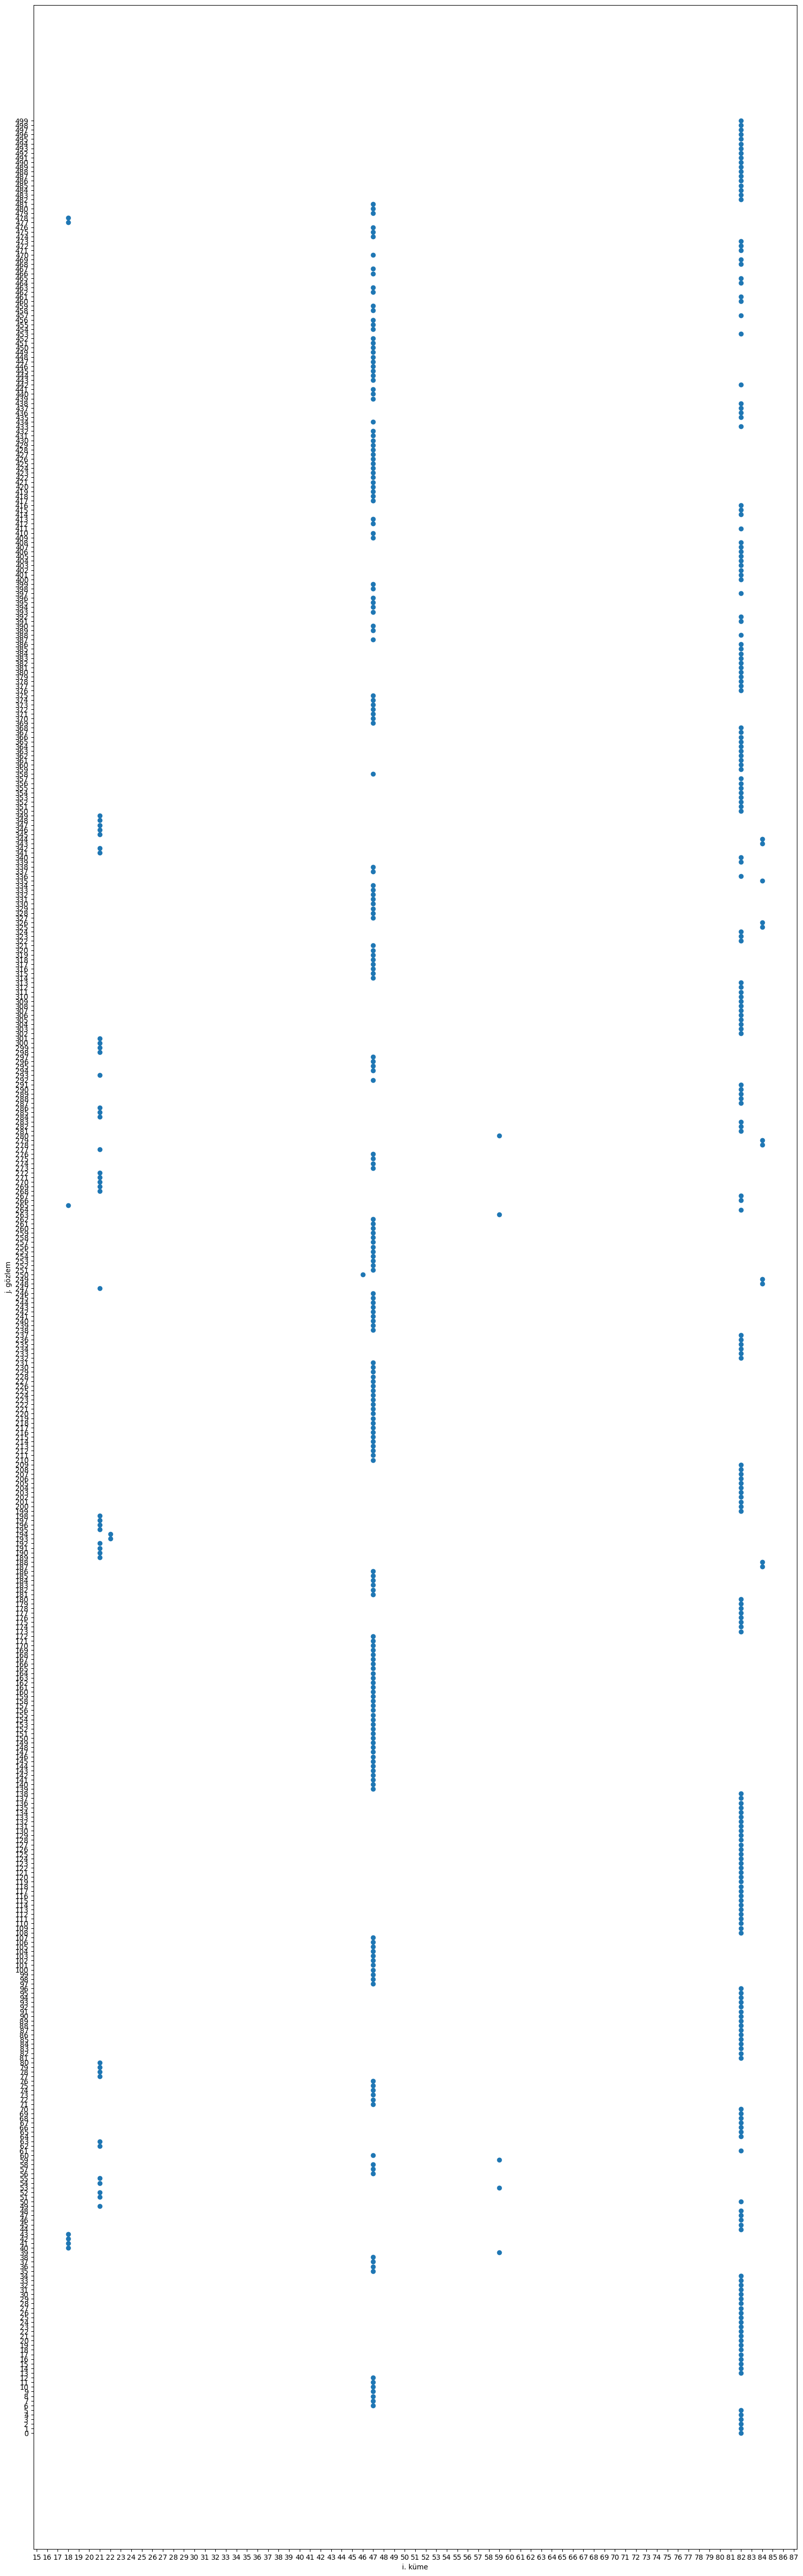

In [38]:

figure_ = plt.figure(figsize = (15,50), dpi = 100);
axes_ = figure_.add_axes([0, 0, 1, 1]);
plt.xticks(np.arange(100))
plt.yticks(np.arange(500));
plt.xlabel("i. küme");
plt.ylabel("j. gözlem");
axes_.scatter(output_v.values(),output_v.keys());
